In [1]:
from DQN.DQN_agent import Agent
from DQN.model import Model

from shared.memory_manager import MemoryManager
from DQN.train import train


import torch
import torch.optim as optim

from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration

import numpy as np
import matplotlib.pyplot as plt

import os


Loading environment football failed: No module named 'gfootball'


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

memory_manager = MemoryManager(15000, 0.99)

model = Model()
model.set_config(Configuration({"columns": 11, "rows": 7}))

#model.load_state_dict(torch.load("tournament/A6TW/DQN/model"))
model.load_state_dict(torch.load("backup/A8/5700_model"))
model.eval()

model.to(device)
model.device = device

#optimizer = optim.SGD(model.parameters(), lr=1e-4)
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer.load_state_dict(torch.load("DQN/opzimizer"))

def epsilon(iteration):
    return 0.001

def greedy(iteration):
    return 0

agent = Agent(model, epsilon)

# opponents = ["main.py", "main.py", "main.py"]
opponents = ["tournament/A6TW/main.py", "tournament/A7/main.py", "tournament/A6TW/main.py"]
#opponents = ["better_random.py", "better_random.py", "better_random.py"]

env = make("hungry_geese", debug=False)

trainer = env.train([None, *opponents])


cuda


In [3]:
params = {}
params["sampling_count"] = 15
params["episode_count"] = 1

params["batch_size"] = 200
params["training_time"] = 1000
params["target_update"] = 200

#agent.epsilon = greedy

In [4]:
train(agent, memory_manager, optimizer, device, trainer, params)

Current Iteration 5750/10000, 57.50%, 419:58, Loss: 105.22, place: 1/0.88, rewards: 407.39, memory position: 12043, time 568:26

KeyboardInterrupt: 

58


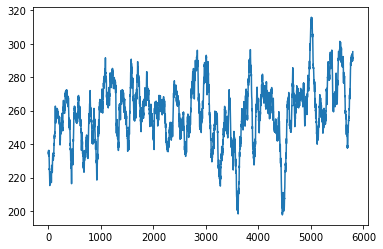

In [5]:
N = int(len(memory_manager.rewards) / 100)
print(N)
plt.plot(np.convolve(memory_manager.rewards, np.ones(N)/N, mode='valid'))

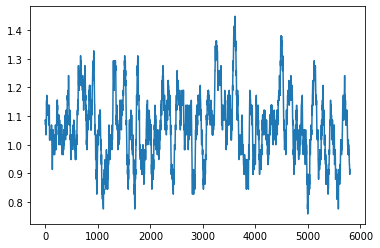

In [6]:
plt.plot(np.convolve(memory_manager.places, np.ones(N)/N, mode='valid'))

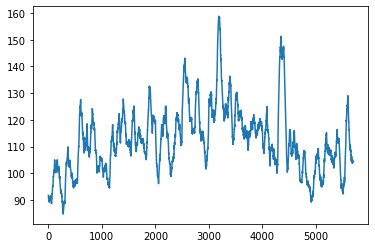

In [7]:
plt.plot(np.convolve(memory_manager.policy_loss, np.ones(N)/N, mode='valid'))

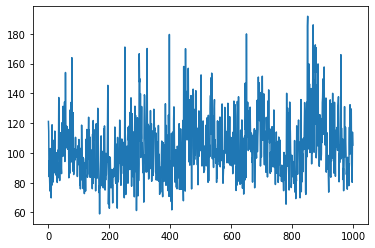

In [8]:
plt.plot(memory_manager.policy_loss[-1000:])

In [9]:
!tar -czvf submission.tar.gz main.py DQN/model DQN/DQN_agent.py DQN/model.py shared/map.py


a main.py
a DQN/model
a DQN/DQN_agent.py
a DQN/model.py
a shared/map.py
